Tarea:

Laura Alejandra Melo

Juan Sebastián Patiño

Víctor Manuel Hernandez

## Quiz

We will demonstrate the change of variables formula with a simple example. Let $Z=(z_1, z_2)$ be a 2-dimensional random variable that is uniformly distributed on the unit square $[0, 1]^2 =: \Omega_Z$. We also define the transformation $f:\mathbb{R}^2 \rightarrow \mathbb{R}^2$ as

$$
\begin{align}
f(z_1, z_2) = (\lambda z_1, \mu z_2)
\end{align}
$$

for some nonzero $\lambda, \mu\in\mathbb{R}$. The random variable $X=(x_1, x_2)$ is given by $X = f(Z)$.

$$
\begin{align}    
V= \left(
\begin{array}{cc}
\lambda & 0\\
0 & \mu
\end{array}
\right)
\end{align}
$$
$$
\begin{align}    
Z= \left(
\begin{array}{c}
z_1 \\
z_2
\end{array}
\right)
\end{align}
$$

$$V*Z =(z_1*\lambda,z_2*\mu)$$

- Ayuda: usar: tfb.ScaleMatvecTriL(scale_tril=[[lambda,0],[0,mu]])

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tfd = tfp.distributions
tfb = tfp.bijectors

# Definir la distribución uniforme en el cuadrado unitario [0, 1]^2
uniform = tfd.Uniform(low=[0., 0.], high=[1., 1.])

# Definir los parámetros de la transformación f: R^2 -> R^2
lambda_val = 2.0
mu_val = 1.5

# Definir el biyector de escala y multiplicación matricial triangular
scale_matvec = tfb.ScaleMatvecTriL(scale_tril=[[lambda_val, 0.], [0., mu_val]])

In [3]:
# Aplicar la transformación a la distribución uniforme
transformed = tfd.TransformedDistribution(distribution=uniform, bijector=scale_matvec)

In [4]:
# Generar muestras de la variable aleatoria transformada
samples_transformed = transformed.sample(1000)

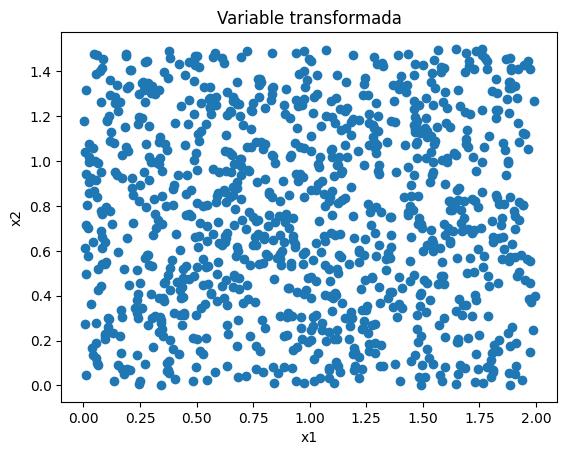

In [6]:
# Muestras transformadas
plt.scatter(samples_transformed[:, 0], samples_transformed[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Variable transformada')
plt.show()

In [7]:
tfb = tfp.bijectors

# Definir los factores de escala
lambda_val = 2.0
mu_val = 1.5

In [8]:
#Definir el biyector de escala no diagonal
scale_bijector = tfb.ScaleMatvecTriL(scale_tril=[[lambda_val, 0.0], [0.0, mu_val]])

In [9]:
# Crear una distribución uniforme en el cuadrado unitario
uniform = tfp.distributions.Uniform(low=0.0, high=1.0)

In [10]:
# Generar muestras de la distribución uniforme
z = uniform.sample([2, 1000])

In [11]:
# Aplicar la transformación utilizando el biyector
x = scale_bijector.forward(tf.transpose(z))

In [12]:
# Calcular el logaritmo de la densidad de probabilidad de X
log_prob_x = uniform.log_prob(scale_bijector.inverse(x)) + scale_bijector.inverse_log_det_jacobian(x, event_ndims=1)

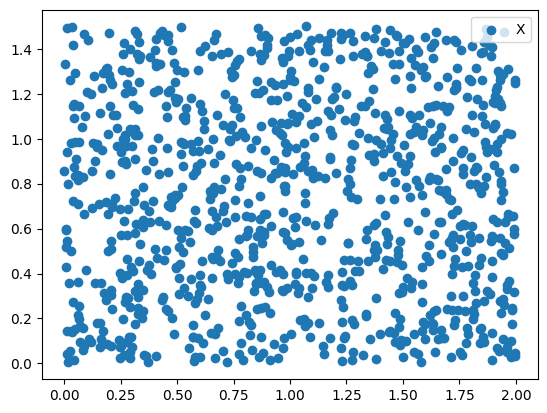

In [14]:

# Visualizar las muestras de X y su densidad de probabilidad
plt.scatter(x[:, 0], x[:, 1], label='X')
plt.legend()
plt.show()




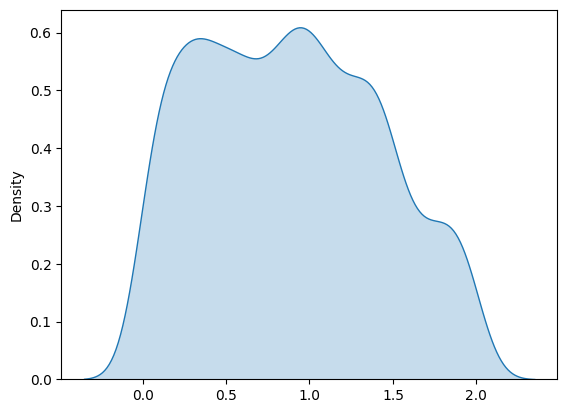

In [15]:
# Visualizar la densidad de probabilidad de X
sns.kdeplot(np.concatenate([x[:, 0], x[:, 1]]), fill=True)
plt.show()